In [12]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

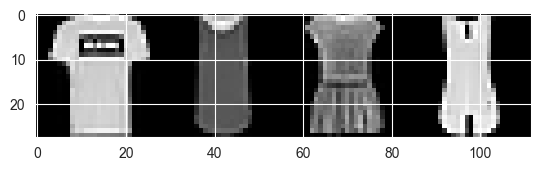

In [13]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
orig = np.zeros((28, 112))
orig[:, :28] = x_train[1]
orig[:, 28:56] = x_train[2]
orig[:, 56:84] = x_train[3]
orig[:, 84:] = x_train[4]

plt.imshow(orig, cmap='gray');

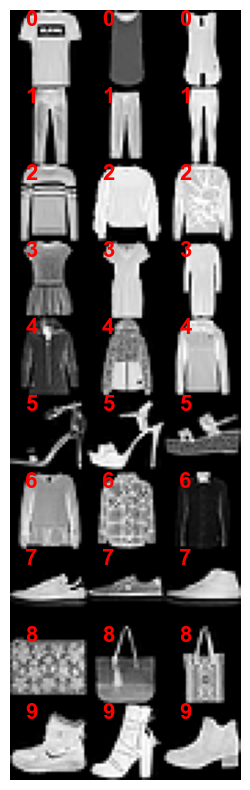

In [14]:
num_classes = 10
images_per_class = 3

grid_height = 28 * num_classes
grid_width = 28 * images_per_class
display_grid = np.zeros((grid_height, grid_width))

plt.figure(figsize=(10, 10))

for i in range(num_classes):

    class_indices = np.where(y_train == i)[0][:images_per_class]
    for j, idx in enumerate(class_indices):

        row_start, row_end = i * 28, (i + 1) * 28
        col_start, col_end = j * 28, (j + 1) * 28
        display_grid[row_start:row_end, col_start:col_end] = x_train[idx]
        plt.text(col_start + 5, row_start + 5, str(i), color='red', fontsize=16, weight='bold')

plt.imshow(display_grid, cmap='gray')
plt.axis('off')  # Hide axes for better visualization
plt.show()


In [15]:

labels_dict = {0: "shirt", 1: "trouser", 2: "pullover", 3: "dress", 4: "coat",
               5: "sandal", 6: "shirt", 7: "sneaker", 8: "bag", 9: "ankle boot"}

# Create a new list with the string labels
Y_test = [labels_dict[label] for label in y_test]

Projecting 784-dimensional data to 2D


C:\Users\krist\AppData\Local\Temp\ipykernel_45496\3949814021.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


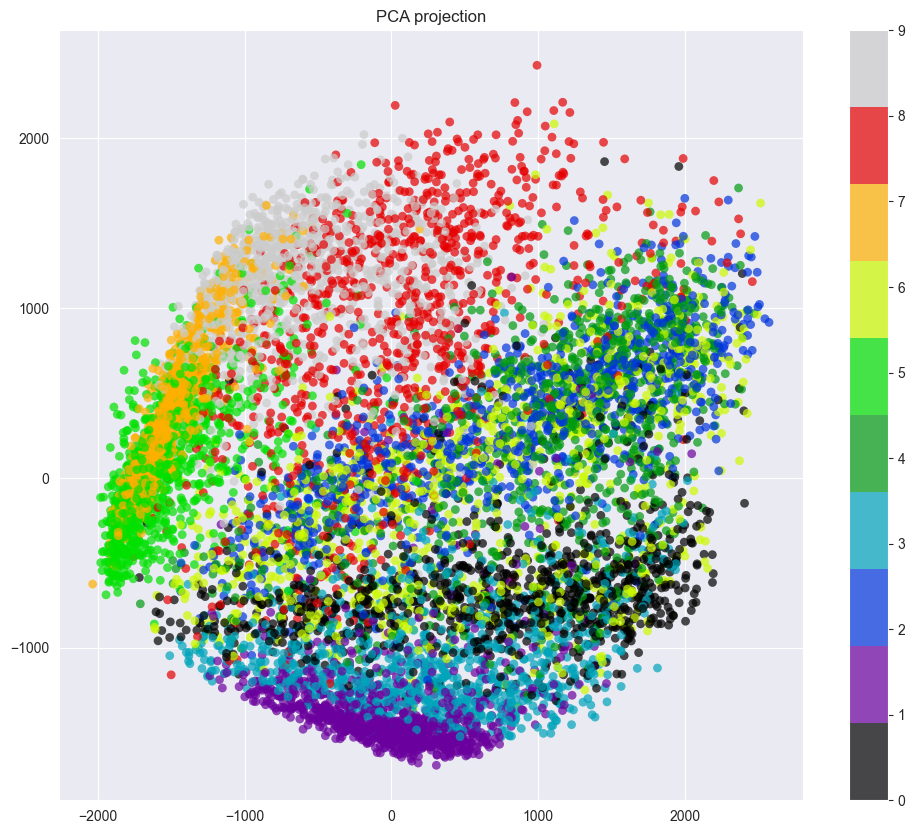

In [16]:
pca = PCA(n_components=2)
x_test = x_test.reshape((x_test.shape[0], -1))
x_reduced = pca.fit_transform(x_test)

print('Projecting %d-dimensional data to 2D' % x_test.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_test,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

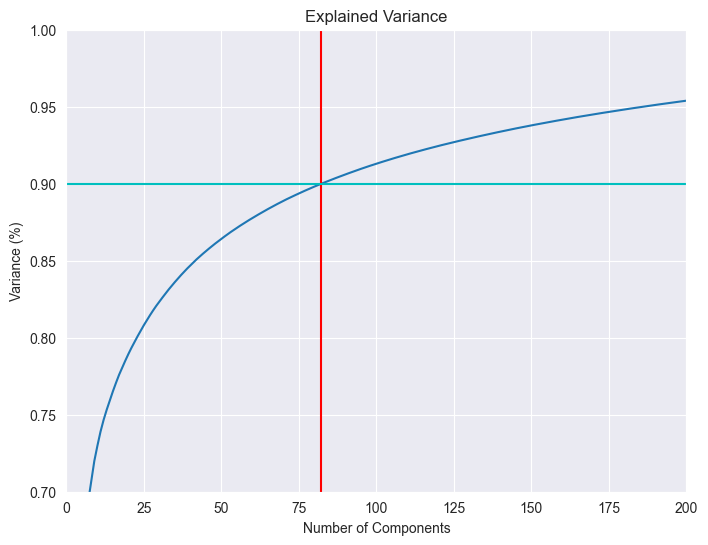

In [17]:
pca = PCA(n_components=None)
x_train = x_train.reshape((x_train.shape[0], -1))
pca.fit(x_train)

components = 82

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.axvline(components, c='r')
plt.axhline(0.9, c='c')
plt.xlim(0, 200)
plt.ylim(0.7, 1)
plt.grid(True)
plt.show()




In [18]:
pca = PCA(n_components=components)


x_train = pca.fit_transform(x_train)

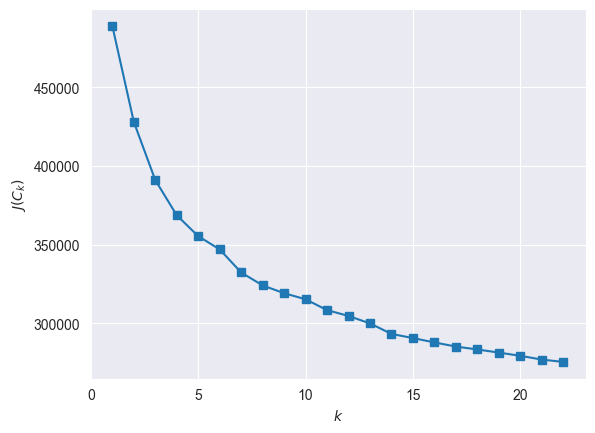

In [19]:
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(k_range, inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

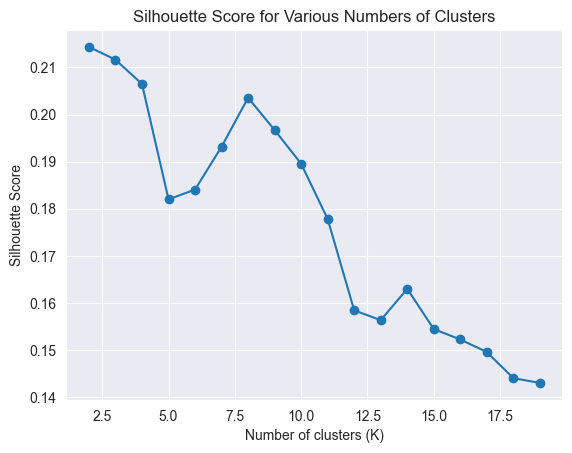

In [21]:
 # Make sure X is in the right shape

silhouette_scores = []  # To store silhouette scores for different number of clusters
K_range = range(2, 20)  # Starting from 2 since silhouette score can't be computed with a single cluster

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=1).fit(x_train)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x_train, labels))

plt.plot(K_range, silhouette_scores, marker='s')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [28]:
k = 8  # The ideal number of clusters you determined
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_train)

KMeans(random_state=42)

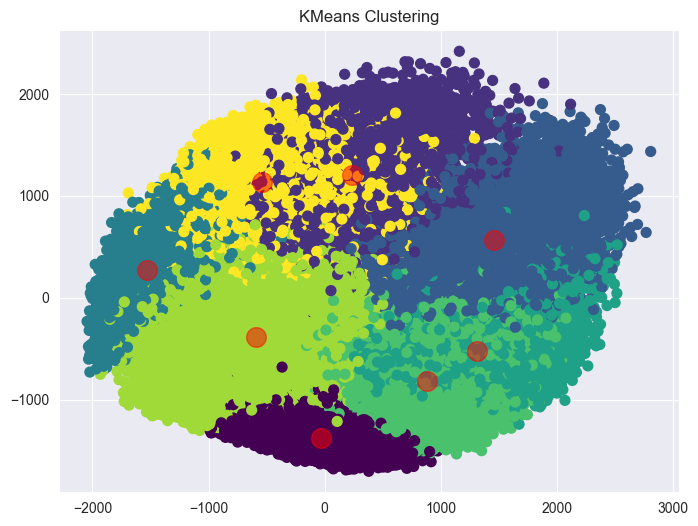

In [29]:
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clustering')
plt.show()

In [31]:
conf_matrix = confusion_matrix(y_train, labels)

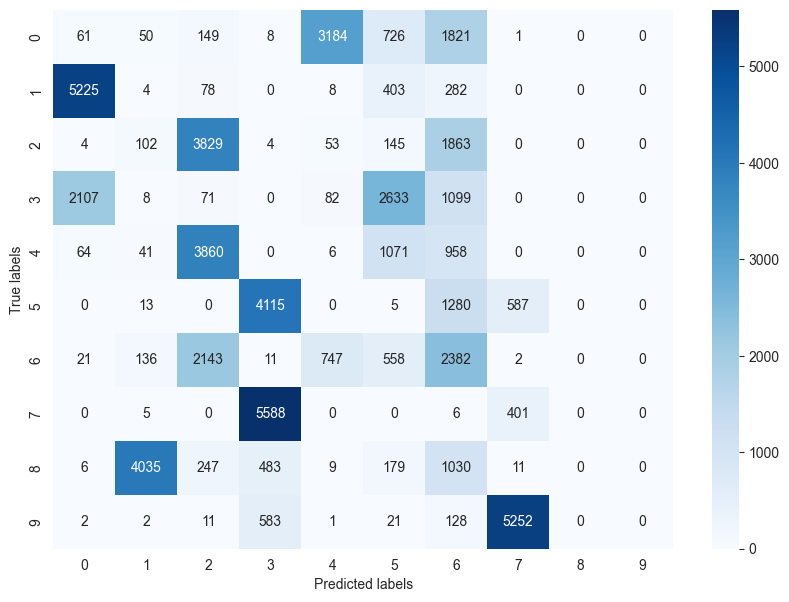

In [32]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [33]:
k = 10  # The ideal number of clusters you determined
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=10, random_state=42)

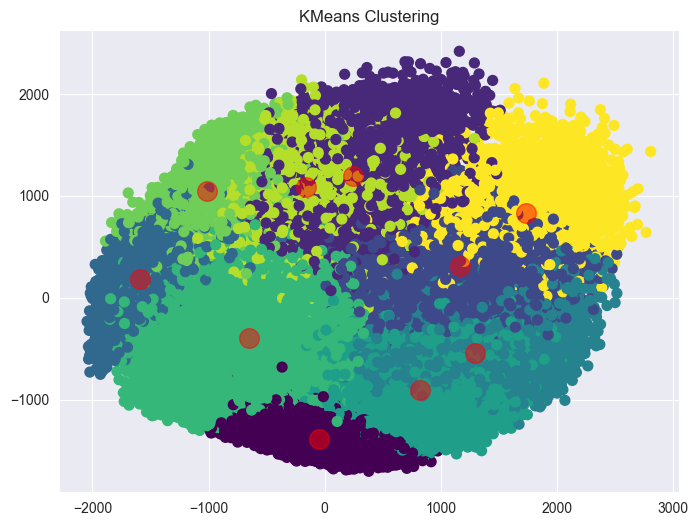

In [34]:
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clustering')
plt.show()

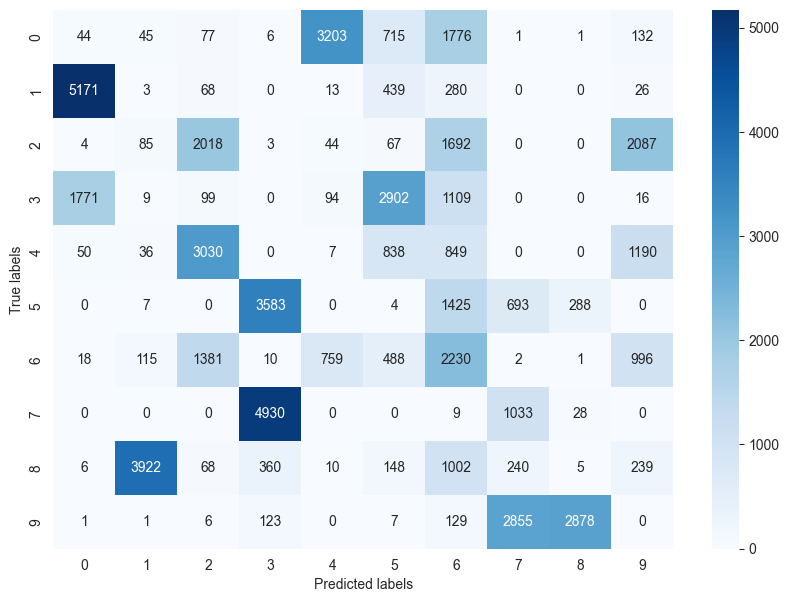

In [37]:
conf_matrix = confusion_matrix(y_train, labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()